<a href="https://colab.research.google.com/github/Aba17/test-live-coding/blob/master/Ababacar_Dioukhan%C3%A9_LogRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Question 0: Import the dataset Dataset

In [ ]:
##### WRITE YOUR CODE HERE #####
path= '/content/diabetes.csv'
data= pd.read_csv(path)
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [ ]:
##### WRITE YOUR CODE HERE #####
data.head(5)
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [ ]:
##### WRITE YOUR CODE HERE #####
data.dtypes
#### END CODE ####

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Question 3: Describe your dataset

In [ ]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [ ]:
##### WRITE YOUR CODE HERE #####
def scale (x):
  return (x-x.mean())/x.std()
#### END CODE ####

Question 5: Scale your features, except the target. 

In [ ]:

##### WRITE YOUR CODE HERE #####
data.iloc[:,:-1]=scale(data.iloc[:,:-1])
data
#### END CODE #### 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1
...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487,0
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677,0
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580,0
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [ ]:

##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [ ]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [ ]:
class logistic_regression:
  def __init__(self, x_test,y_test,num_iters= 100,threshold= 0.5, tolerance= 1e-10, lr= 0.0006):
    ##### WRITE YOUR CODE HERE #####
    self.theta=None
    self.cost_history=[]
    self.cost_history_test=[]
    self.num_iters=num_iters
    self.threshold=threshold
    self.tolerance=tolerance
    self.lr=lr
    self.x_test=x_test
    self.y_test=y_test
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    return np.hstack([np.ones((x.shape[0],1)),x])
    #### END CODE ####

  def sigmoid(self, x):
    ##### WRITE YOUR CODE HERE #####
    #print(x.shape,self.theta.shape)
    z= x@ self.theta
    return 1/(1+np.exp(-z))
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = len(x)# Length of x
    y_pred = self.sigmoid(x)
    Cost = -np.sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))/n
    return Cost
    #### END CODE ####

  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    n = len(x)
    x= self.add_ones(x) # Add ones to x
    y= y.reshape(-1,1)# reshape y. This is optional, do it if needed
    self.x_test=self.add_ones(self.x_test)
    self.y_test=self.y_test.reshape(-1,1)
    self.theta= np.zeros((x.shape[1],1)) # Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
      y_pred= self.sigmoid(x) # using sigmoid function 

      # Gradient of cross-entropy
      grad= -x.T@(y-y_pred)
      grad= grad.reshape(-1,1) # Reshape, if it is needed
      
      # update rules
      self.theta-=(1/n)*grad*self.lr
      # Compute the training loss
      loss=self.cross_entropy(x,y)
      self.cost_history.append(loss)
      loss_test=self.cross_entropy(self.x_test,self.y_test)
      self.cost_history_test.append(loss_test)

      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    self.plot()
    #### END CODE ####
  
  def predict(self, x):
    proba= self.predict_proba(x) # Get probability of x
    result=np.where(proba< 0.5,0,1)  # Convert proba to 0 or 1. hint: list comprehension
    return  result
  
    
  def predict_proba(self, x):
    #x= self.add_ones(x) # Apply add ones to x
    y_pred_prob= self.sigmoid(x)# Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    #print(self.cost_history.shape,self.cost_history_test.shape)
    plt.plot(self.cost_history,label="Train Loss")
    plt.plot(self.cost_history_test,label="Test Loss")
    plt.legend()
    plt.show()
    #### END CODE ####

In [ ]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(x_test,y_test,num_iters=10000)

cost for 100 iteration : 0.6864102404298645
cost for 200 iteration : 0.6799653962230757
cost for 300 iteration : 0.6737982743498655
cost for 400 iteration : 0.6678950945975802
cost for 500 iteration : 0.6622426755227996
cost for 600 iteration : 0.6568284338265025
cost for 700 iteration : 0.6516403786300652
cost for 800 iteration : 0.6466671015145257
cost for 900 iteration : 0.6418977631167545
cost for 1000 iteration : 0.6373220769995813
cost for 1100 iteration : 0.6329302914330323
cost for 1200 iteration : 0.6287131696441975
cost for 1300 iteration : 0.6246619690164689
cost for 1400 iteration : 0.6207684196467952
cost for 1500 iteration : 0.6170247026033441
cost for 1600 iteration : 0.6134234281661556
cost for 1700 iteration : 0.6099576142802314
cost for 1800 iteration : 0.6066206654039411
cost for 1900 iteration : 0.603406351895323
cost for 2000 iteration : 0.6003087900443997
cost for 2100 iteration : 0.5973224228304809
cost for 2200 iteration : 0.5944420014590432
cost for 2300 iterat

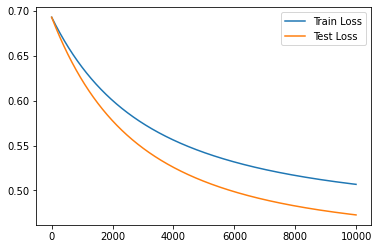

CPU times: user 1.91 s, sys: 8.83 ms, total: 1.92 s
Wall time: 1.92 s


In [ ]:
%%time
model.fit(x_train, y_train)

In [ ]:
x_test=model.add_ones(x_test)
pred= model.predict(x_test)

In [ ]:
pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Predict Proba
print(model.predict_proba(x_test))

[[0.16270989]
 [0.24967963]
 [0.27203558]
 [0.14272622]
 [0.63669043]
 [0.47542589]
 [0.32711095]
 [0.37169228]
 [0.1154242 ]
 [0.26124681]
 [0.12645858]
 [0.2776188 ]
 [0.71761166]
 [0.07962647]
 [0.6179086 ]
 [0.15231702]
 [0.48070582]
 [0.46928204]
 [0.42967049]
 [0.17307393]
 [0.33932726]
 [0.45289085]
 [0.48876748]
 [0.26669745]
 [0.36813748]
 [0.70406204]
 [0.23410394]
 [0.41111967]
 [0.49528962]
 [0.37134621]
 [0.09878948]
 [0.84811286]
 [0.17608758]
 [0.42265159]
 [0.18294917]
 [0.49001541]
 [0.59932851]
 [0.42630789]
 [0.21165359]
 [0.8668839 ]
 [0.18570042]
 [0.34973081]
 [0.64273391]
 [0.82395753]
 [0.30055492]
 [0.16577853]
 [0.39830195]
 [0.6412999 ]
 [0.48506308]
 [0.44331483]
 [0.35428347]
 [0.63660835]
 [0.63525486]
 [0.09138026]
 [0.52196896]
 [0.26754538]
 [0.38166394]
 [0.70409874]
 [0.28479829]
 [0.8575791 ]
 [0.81847593]
 [0.44506391]
 [0.24670192]
 [0.17365338]
 [0.28646081]
 [0.19483409]
 [0.15003903]
 [0.16163436]
 [0.43325598]
 [0.43552742]
 [0.57447897]
 [0.49

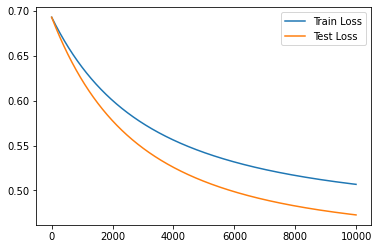

In [ ]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [ ]:
my_token= ""
my_repository= ""
username= ""
useremail= ""

Clone the repo

In [ ]:
! git clone https://github.com/{username}/{my_repository}.git

In [ ]:
! git remote -v

Copy data to test-live-coding folder

In [ ]:
!cp diabetes.csv /content/test-live-coding

In [ ]:
%cd /content/test-live-coding

In [ ]:
!git status

In [ ]:
!git config user.email useremail
!git config user.name username

In [ ]:
!git add .
!git commit -m "Add my files"

In [ ]:
!git status

In [ ]:
!git push -u origin master --force

# If you cannot push, use:

In [ ]:
!git remote rm origin

In [ ]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

In [ ]:
!git push -u origin master --force

---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [ ]:
class logistic_regression_l1:
  pass

In [ ]:
class logistic_regression_l2:
  pass

In [ ]:
class logistic_regression_l1_l2:
  pass

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?